### Intro
This is the extended version of 1,2,1-neural network in previous notebook in to a 1,4,1-neural network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample


def percentage(x):return f"{round(100*x,4)}%"

In [2]:
# #generate data
# m = 10000
# x_train = np.random.rand(m)
# y_train = np.logical_and(x_train>0.5,x_train<0.75).astype(np.int16)

# x_y = np.hstack((x_train.reshape(-1,1),y_train.reshape(-1,1)))


# print(x_y)

### Generating an unbiased data set
We need to have %50 : 50%  positives:negatives

In [3]:
m = 1000


# #criteria: 0.25-0.75 --> 1 & elsewhere --> 0
# pos_x = 0.25 + 0.5 * np.random.rand(m//2)
# neg_x1 = 0 + 0.25 * np.random.rand(m//4)
# neg_x2 = 0.75 + 0.25 * np.random.rand(m//4)
# neg_x = np.concatenate((neg_x1,neg_x2))

# x_train = np.concatenate((pos_x,neg_x))
# y_train = np.logical_and(x_train>0.25,x_train<0.75).astype(np.int16)

# x_y = np.hstack((x_train.reshape(-1,1),y_train.reshape(-1,1)))
# print(x_y)



#criteria: odd quartile--> 1 & elsewhere--> 0
x_train = np.random.rand(m)
y_train = np.logical_or(x_train<0.25, np.logical_and(x_train>0.5,x_train<0.75)).astype(np.int16)
x_y = np.hstack((x_train.reshape(-1,1),y_train.reshape(-1,1)))
print(x_y)


[[0.26450391 0.        ]
 [0.55809311 1.        ]
 [0.73715831 1.        ]
 ...
 [0.84383917 0.        ]
 [0.96272857 0.        ]
 [0.59343178 1.        ]]


### Noise to inputs

In [4]:
#introduce some noise in to x_train
if 'need noise to x_train':
    noise =  0.1 * (2*np.random.rand(len(x_train))-1)
    x_train += noise

### Train the weights

initial: -0.011467219720725286 0.5135444077199445 0.7312774063296403 -0.3701625887166693 0.47977892411051015 -0.16678648555924735 -0.4124367769684718 -0.3614648755095933 0.811179314569255 -0.0990261687436067 -0.4545338727469477 -0.18014733000833116 0.1779388148176444
final: -10.647151026451775 2.2012954898697092 9.853156661016753 17.712942817281085 7.980119396347549 -0.6611120696985273 -1.8968874192956935 -9.052935207100905 13.37841472247125 -3.7791655925896137 -14.653755799073938 13.1794176358628 -2.3651881815365408


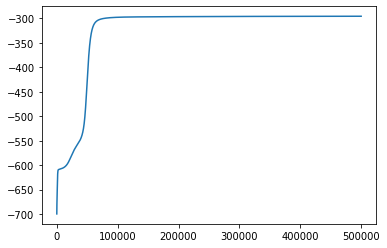

In [5]:
x_train_all, y_train_all = x_train, y_train

def sigmoid(t):return 1/(1+np.exp(-t))

w1,w2,w3,w4,b1,b2,b3,b4,theta1,theta2,theta3,theta4,k = 2*np.random.rand(13)-1
    
print("initial:", w1,w2,w3,w4,b1,b2,b3,b4,theta1,theta2,theta3,theta4,k)
n_iter = 500_000

L_history = []
x_train_indices = list(range(len(x_train_all)))

for _ in range(n_iter):
#     #stochastic version
#     samples = sample(x_train_indices,500)
#     x_train = x_train_all[samples]
#     y_train = y_train_all[samples]

    #batch versison
    x_train =  x_train_all
    y_train =  y_train_all
    
    
    z1 = sigmoid(w1*x_train+b1)
    z2 = sigmoid(w2*x_train+b2)
    z3 = sigmoid(w3*x_train+b3)
    z4 = sigmoid(w4*x_train+b4)
    
    A =  sigmoid(theta1*z1+theta2*z2+theta3*z3+theta4*z4+k)
    diff = y_train-A
    
    # L = log of joint likelihood
    L = (y_train * np.log(A) + (1-y_train) * np.log(1 -A)).sum()
    L_history.append(L)
    # need to maximize
    dL_dk = diff.sum()
    
    dL_dtheta1 = (diff * z1).sum()
    dL_dtheta2 = (diff * z2).sum()
    dL_dtheta3 = (diff * z3).sum()
    dL_dtheta4 = (diff * z4).sum()
    
    
    dL_db1 = (diff * theta1 * z1 * (1 -z1) ).sum()
    dL_db2 = (diff * theta2 * z2 * (1 -z2) ).sum()
    dL_db3 = (diff * theta3 * z3 * (1 -z3) ).sum()
    dL_db4 = (diff * theta4 * z4 * (1 -z4) ).sum()
    
    dL_dw1 = (diff * theta1 * z1 * (1-z1) * x_train ).sum()
    dL_dw2 = (diff * theta2 * z2 * (1-z2) * x_train ).sum()
    dL_dw3 = (diff * theta3 * z3 * (1-z3) * x_train ).sum()
    dL_dw4 = (diff * theta4 * z4 * (1-z4) * x_ train ).sum()
    
    
    #gradient accent
    lr = 1e-1/m
    
    w1 += lr * dL_dw1
    w2 += lr * dL_dw2
    w3 += lr * dL_dw3
    w4 += lr * dL_dw4
    
    b1 += lr * dL_db1
    b2 += lr * dL_db2
    b3 += lr * dL_db3
    b4 += lr * dL_db4
    
    theta1 += lr * dL_dtheta1
    theta2 += lr * dL_dtheta2
    theta3 += lr * dL_dtheta3
    theta4 += lr * dL_dtheta4
    
    k +=  lr * dL_dk
    


print("final:", w1,w2,w3,w4,b1,b2,b3,b4,theta1,theta2,theta3,theta4,k)

plt.plot(L_history)

In [6]:
z1 = sigmoid(w1*x_train+b1)
z2 = sigmoid(w2*x_train+b2)
z3 = sigmoid(w3*x_train+b3)
z4 = sigmoid(w4*x_train+b4)
    
A =  sigmoid(theta1*z1+theta2*z2+theta3*z3+theta4*z4+k)
y_hat = (A>0.5)

print("Accuracy:",percentage(np.sum(y_hat == y_train)/len(y_train)))

Accuracy: 86.6%


In [9]:
x_set = [i/100 for i in range(0,100,1)]

A_list = []

for x in x_set:
    z1 = sigmoid(w1*x+b1)
    z2 = sigmoid(w2*x+b2)
    z3 = sigmoid(w3*x+b3)
    z4 = sigmoid(w4*x+b4)
    
    A =  sigmoid(theta1*z1+theta2*z2+theta3*z3+theta4*z4+k)
    A_list.append(A)
    print(x , "is less than 0.25 or between 0.5 - 0.75: ------------>" , A>0.5, "( A= ", A, ")")

0.0 is less than 0.25 or between 0.5 - 0.75: ------------> True ( A=  0.9995951863950101 )
0.01 is less than 0.25 or between 0.5 - 0.75: ------------> True ( A=  0.9995111072435224 )
0.02 is less than 0.25 or between 0.5 - 0.75: ------------> True ( A=  0.9994021318571082 )
0.03 is less than 0.25 or between 0.5 - 0.75: ------------> True ( A=  0.999259357114963 )
0.04 is less than 0.25 or between 0.5 - 0.75: ------------> True ( A=  0.9990702435220709 )
0.05 is less than 0.25 or between 0.5 - 0.75: ------------> True ( A=  0.9988169829185114 )
0.06 is less than 0.25 or between 0.5 - 0.75: ------------> True ( A=  0.998474087010268 )
0.07 is less than 0.25 or between 0.5 - 0.75: ------------> True ( A=  0.9980048149472805 )
0.08 is less than 0.25 or between 0.5 - 0.75: ------------> True ( A=  0.997355875698858 )
0.09 is less than 0.25 or between 0.5 - 0.75: ------------> True ( A=  0.9964495821370453 )
0.1 is less than 0.25 or between 0.5 - 0.75: ------------> True ( A=  0.995172281191

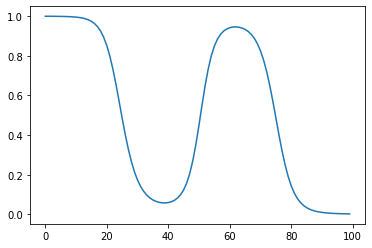

In [10]:
plt.plot(A_list)

### Explanation



In [8]:
A = np.array([1,2,3,4,5])
A[[1,2,3]]

array([2, 3, 4])